# Skymap
Função que, dados os ângulos $\alpha$ e $\delta$ (coordenadas equatoriais), retorna o mapa celeste com a distribuição dos pontos. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def plot_ait(RA, Dec, org=0, projection="aitoff", alpha_d=None, delta_d=None):
    # RA e Dec devem ser dados em grau
    x = np.remainder(RA+360-org, 360) # shift RA values
    ind = x>180
    if type(x) == type(np.float64()):
        x -= 360
    else:
        x[ind] -=360
    x=-x # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels + 360 + org, 360)
    fig = plt.figure(figsize = (10, 5), dpi = 75)
    ax = fig.add_subplot(111, projection = projection)
    ax.scatter(np.radians(x), np.radians(Dec), s=12, marker=".", color="#03a0ff") # convert degrees to radians
    if alpha_d is not None and delta_d is not None:
        y = np.remainder(alpha_d+360-org, 360)
        y -= 360
        y = -y
        ax.scatter(np.radians(y), np.radians(delta_d), color = "r")
    ax.set_xticklabels(tick_labels) # we add the scale on the x axis
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(16)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(14)
    ax.grid(True)
    fig.savefig("Gráfico Aitoff", ext='png')

In [3]:
# Cria números aleatórios
np.random.seed(91456)
u = np.random.random_sample(5000)
np.random.seed(9011)
v = np.random.random_sample(5000)
np.random.seed()

In [4]:
#Associar phi e theta a u e v
phi_rad = 2. * np.pi * v 
theta_rad = np.arccos(((2. * u) - 1.))

Sabemos amostrar os ângulos $\phi$ e $\theta$. A associação com as coordenadas equatoriais é dada por:
$$\alpha = \phi$$

$$\delta = \theta - \frac{\pi}{2}.$$

In [5]:
#Relacionar alpha e delta (coordenadas equatoriais) com phi e theta 
#alpha = phi
alpha_graus = np.degrees(phi_rad)

#delta = theta - pi/2
delta_graus = np.degrees(theta_rad - (np.pi / 2.))

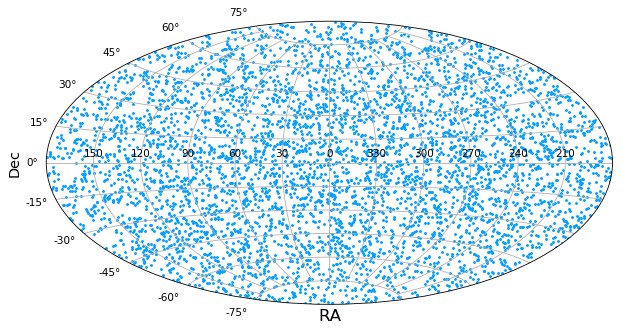

In [10]:
plot_ait(alpha_graus, delta_graus)